In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
%matplotlib inline

In [22]:
#Parameters (Gaussian units)
q=1.0
m=1.0 
c=1.0
B=np.array([0.0,0.0,4.0])
B_mag = np.linalg.norm(B)
b_hat = B / B_mag

#Initial conditions
r0 = np.array([0.5, 0.0, -1.5])     
v0 = np.array([0.3, 0.8, 0.3])  

#Lorentz factor
gamma = 1.0 / np.sqrt(1 - (np.linalg.norm(v0) / c)**2)

#Gyrofrq
omega_c = q*B_mag / (m*gamma*c)

#V parallel and perpendicular to B  
v_par = np.dot(v0, b_hat) * b_hat
v_perp = v0 - v_par
b_cross_v_perp = np.cross(b_hat, v_perp)

In [23]:
#Time parameters
dt = 0.11
N_steps = 150
times = np.linspace(0, dt*(N_steps-1), N_steps)

#Trajectory 
traj = np.zeros((N_steps, 3))
for i, t in enumerate(times): #Enumerate returns a pair (index,element)
    #traj[i] is the soluction for the dif. eq. with uniform B and neglecting E
    traj[i] = (r0 + v_par * t
        + (v_perp/omega_c) * np.sin(omega_c*t)
        - (b_cross_v_perp/omega_c) * (np.cos(omega_c*t) - 1))

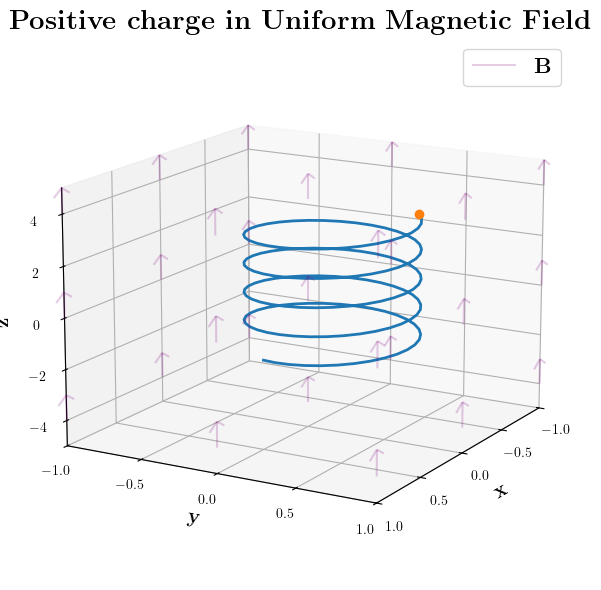

In [28]:
#Figure
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.grid(color='lightgray', linestyle='--', linewidth=0.5)
ax.view_init(elev=15, azim=30)  
ax.set_title(r'\textbf{Positive charge in Uniform Magnetic Field}', fontsize=20)

#Adjusting the "look" of the axis
ax.tick_params(labelsize=10)
ax.xaxis.set_major_locator(plt.MaxNLocator(4)) #This adjusts the maximum number of intervals
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
ax.zaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel(r'\textbf{x}', fontsize=15)
ax.set_ylabel(r'\textbf{y}', fontsize=15)
ax.set_zlabel(r'\textbf{z}', fontsize=15)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-5, 5)

#Plotting B as an uniform field
#Grid where the "arrows" will be
x, y, z = np.meshgrid(np.linspace(-1, 1, 3), #In x
                      np.linspace(-1, 1, 3), #In y
                      np.linspace(-4, 4, 3)) #In z

#Defining a full uniform field in the b_hat direction in each point of the grid
u,v,w = np.full_like(x, b_hat[0]), np.full_like(y, b_hat[1]), np.full_like(z, b_hat[2])

#Drawing vectors starting at (x,y,z) and pointing in the direction (u,v,w)
ax.quiver(x, y, z, u, v, w, normalize=True, color='purple', alpha=0.2, label=r'\textbf{B}')
ax.legend(fontsize=16)

#Animation

#Initialization
line, = ax.plot([], [], [], lw=2) #We'll fill here the particle's path
point, = ax.plot([], [], [], 'o') #THis is for particle itself

def init(): #This function clears the data in line and point to prevent "garbage"
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

def update(frame):
    #Take the trajectory from t=0 up to the current frame
    x, y, z = traj[:frame,0], traj[:frame,1], traj[:frame,2]
    #Updating the same line object so it “grows” one point at a time
    #This preserves the existing tail instead of erasing and redrawing the entire curve each frame
    line.set_data(x, y)
    line.set_3d_properties(z)
    #Moving the particle to the next position
    point.set_data([traj[frame,0]], [traj[frame,1]])
    point.set_3d_properties([traj[frame,2]])
    return line, point

ani = animation.FuncAnimation(fig, update, frames=N_steps, 
                              init_func=init, interval=20, blit=True)

#Save animation
ani.save('Movement.gif', writer='pillow', fps=60)
plt.tight_layout()
plt.show()   